In [1]:
from IPython.display import Markdown, display

import os
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
if os.path.exists('src'):
    %load_ext autoreload
    %autoreload 2

    from src.stattests import f_test, t_test, t_test_benf, t_test_nk, dunnetts_test
else:
    !git clone https://github.com/P-Mihail/medstats_ex.git
    from medstats_ex.src.stattests import f_test, t_test, t_test_benf, t_test_nk, dunnetts_test  # type: ignore

### Глава 4
#### Сравнение двух групп: критерий Стьюдента

Критерий Стьюдента, когда выборки содержат неодинаковое число членов:

$t=\cfrac{\overline X_1 - \overline X_2}{\sqrt {S^2_{\overline X_1} + S^2_{\overline X_2}}}=\cfrac{\overline X_1 - \overline X_2}{\sqrt {\cfrac{S^2_1}{n_1} + \cfrac{S^2_2}{n_2}}}=\cfrac{\overline X_1 - \overline X_2}{\sqrt {\cfrac{S^2}{n_1} + \cfrac{S^2}{n_2}}}$


$S^2=\cfrac{(n_1-1)s^2_1+(n_2-1)s^2_2}{n_1+n_2-2}$

$S_{\overline X_1}$ и $S_{\overline X_2}$ - стандартные ошибки средних для двух выборок.

$S_1$ и $S_2$ - стандартные отклонения выборок.

$S^2$ - объединенная оценка дисперсии для выборок объема $n_1$ и $n_2$


$\nu=n_1+n_2-2$ - число степеней свободы.

#### Критерий Стьюдента для множественных сравнений

! В первую очередь следует с помощью дисперсионного анализа проверить нулевую гипотезу о равенстве всех средних, а уже затем если нулевая гипотеза отвергнута выделить среди них отличные от остальных, используя для этого методы множественного сравнения.

##### Поправки Бонферрони

*хорошо работают если число сравнений не велико (до 8) иначе становится слишком строгим и даже весьма большие различия приходится признавать статистически незначимыми*

Если мы хотим обеспечить вероятность ошибки $\alpha\prime$, то в каждом из сравнений мы должны принять уровень значимости $\frac{\alpha\prime}{k}$, где $k$ - количество сравнений. При сравнении нескольких групп с одной контрольной $k=m-1$, где $m$ - количество групп.

Способ смягчить строгость поправки Бонферрони состоит в том, чтобы увеличить число степеней свободы, воспользовавшись внутригрупповой оценкой дисперсии вместо объединенной оценки дисперсии.

$t=\cfrac{\overline X_1 - \overline X_2}{\sqrt {\cfrac{S_w^2}{n_1} + \cfrac{S_w^2}{n_2}}}$, тогда $\nu=\displaystyle\sum_{i=1}^{m}{n}-m$ - число степеней свободы.

##### Критерий Ньюмена-Кейлса

*для большого числа сравнений, когда поправки Бонферрони делает критерий Стьюдента излишне жестким.*

Сначала нужно с помощью дисперсионного анализа проверить нулевую гипотезу о равенстве всех средних. Если она отвергается, все средние упорядочивают по возрастанию и сравнивают попарно, каждый раз вычисляя значение критерия Ньюмена–Кейлса:

$q=\cfrac{\overline X_A - \overline X_B}{\sqrt {\cfrac{S_w^2}{2}*(\cfrac{1}{n_A} + \cfrac{1}{n_B})}}$, где $\overline X_A$ и $\overline X_B$ — сравниваемые средние, $S_w^2$ — внутригрупповая дисперсияя, а $n_A$ и $n_B$ численность групп.

$q$ сравнивается с критическим значением зависящем от $α\prime$ (вероятность ошибочно обнаружить различия хотя бы в одной из всех сравниваемых пар, то есть истинный уровень значимости), числа степеней свободы $\nu=\displaystyle\sum_{i=1}^{m}{n}-m$ и величины $l = j – i + 1$ - интервал сравнения (где $j$ и $i$ это места сравниваемых средних в упорядоченном ряду). 

##### Критерий Тьюки

Критерии Тьюки совпадает с критерием Ньюмена-Кейлса во всем кроме способа определения критического значения.

В критерии Тьюки при всех сравнениях вместо l берут число групп m, таким образом, критическое значение q все время одно и то же. Критерий Ньюмена-Кейлса был разработан как усовершенствование критерия Тьюки.

### Множественные сравнения с контрольной группой

задача заключается в том, чтобы сравнить несколько групп с единственной — контрольной.

##### Поправка Бонферрони

Ход вычислений такой же что и при применении поправки Бонферрони в общем случае.  Число сравнений в данном случае $k=m-1$ соответственно уровень значимости в каждом из сравнений $\alpha=\alpha\prime/k$ 

##### Критерии Даннета

Критерии Даннета — это вариант критерия Ньюмена–Кейлса для сравнения нескольких групп с одной контрольной.

$q\prime=\cfrac{\overline X_{контр} - \overline X_A}{\sqrt {S_w^2*(\cfrac{1}{n_{контр}} + \cfrac{1}{n_A})}}$

Число сравнении равно числу групп не считая контрольной, и существенно меньше числа сравнений в исходном критерии Ньюмена–Кейлса. Критические значения берутся из соответствующей таблицы.  Параметр l постоянен и равен числу групп включая контрольную. Число степеней свободы вычисляют как в критерии Ньюмена–Кейлса: $\nu=\displaystyle\sum_{i=1}^{m}{n}-m$

**4.1.**

Конахан и соавт. определили среднее артериальное давление и общее периферическое сосудистое сопротивление при операциях на открытом сердце с галотановой (9 больных) и морфиновой (16 больных) анестезией. Результаты приведены в табл.4.2. Можно ли утверждать, что в группах галотановой и морфиновой анестезии эти гемодинамические показатели различаются статистически значимо?


Показатель|Галотан среднее|Галотан ст.откл.|Морфин среднее|Морфин ст.откл.
-|-|-|-|-
Среднее артериальное давление при наилучшем сердечном индексе, мм рт. ст.|76.8|13.8|91.4|19.6
Общее периферическое сосудистое сопротивление при наилучшем сердечном индексе, дин с см-5|2210|1200|2830|1130 

In [3]:
df = pd.DataFrame(
    data=[[76.8, 13.8, 91.4, 19.6], [2210, 1200, 2830, 1130]],
    index=[
        "Среднее артериальное давление при наилучшем сердечном индексе, мм рт. ст.", 
        "Общее периферическое сосудистое сопротивление при наилучшем сердечном индексе, дин с см-5"],
    columns=pd.MultiIndex.from_tuples(product(["Галотан", "Морфин"],["mean", "std"]))
)

display(df)

Галотан          Морфин  \
                                                      mean     std    mean   
Среднее артериальное давление при наилучшем сер...    76.8    13.8    91.4   
Общее периферическое сосудистое сопротивление п...  2210.0  1200.0  2830.0   

                                                            
                                                       std  
Среднее артериальное давление при наилучшем сер...    19.6  
Общее периферическое сосудистое сопротивление п...  1130.0

### 1. Среднее артериальное давление при наилучшем сердечном индексе, мм рт. ст.

mean   std
Среднее артериальное давление при наилучшем сер... Галотан  76.8  13.8
                                                   Морфин   91.4  19.6

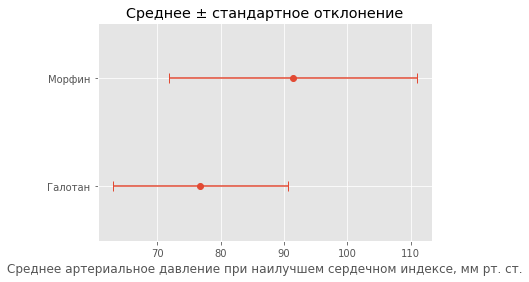

Объединенная оценка дисперсии: 316.779
Число степеней свободы: 23

t = -1.969
p = 0.061
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.807, t05 = 2.069

Различия статистически не значимы. P = 0.061 > 0.05 (|t = -1.969| < t05 = 2.069)


---

### 2. Общее периферическое сосудистое сопротивление при наилучшем сердечном индексе, дин с см-5

mean     std
Общее периферическое сосудистое сопротивление п... Галотан  2210.0  1200.0
                                                   Морфин   2830.0  1130.0

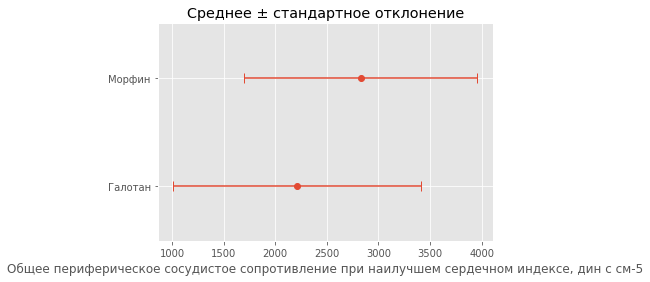

Объединенная оценка дисперсии: 1333630.435
Число степеней свободы: 23

t = -1.289
p = 0.210
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.807, t05 = 2.069

Различия статистически не значимы. P = 0.210 > 0.05 (|t = -1.289| < t05 = 2.069)


---

In [4]:
for i, name in enumerate(df.index):
    display(Markdown(f"### {i + 1}. {name}"))
    data = df.loc[[name]].stack(0)
    display(data)
    
    fig, ax = plt.subplots()
    ax.errorbar(x=data["mean"], y=data.index.get_level_values(1), xerr=data["std"], fmt='o', capsize=5);
    ax.set_xlabel(data.index.get_level_values(0)[0]);
    ax.set_ylim(-.5, 1.5);
    ax.set_title("Среднее \u00b1 стандартное отклонение");
    plt.show()
    plt.close()
    
    t_test([9, 16], data["mean"], data["std"], silent=False)
    display(Markdown("---"))

Различия обоих гемодинамическйх показателей статистически не значимы.

**4.2**

Кокаин чрезвычайно вреден для сердца, он может вызвать инфаркт миокарда даже у молодых людей без атеросклероза. Кокаин сужает коронарные сосуды что приводит к уменьшению притока крови к миокарду кроме того, он ухудшает насосную функцию сердца. Нифедипин (препарат из группы антагонистов кальция) обладает способностью расширять сосуды, его применяют при ишемической болезни сердца. Ш. Хейл и соавт. (S. L. Hale, К. J. Alker, S. H. Rezkalla et al. Nifedipine protects the heart from the acute deleterious effects of cocaine if administered before but not after cocaine. Circulation, 83:1437—1443, 1991) предположили, что нифедипин можно использовать и при поражении сердца, вызванном кокаином. Собакам вводили кокаин, а затем нифедипин либо физиологический раствор. Показателем насосной функции сердца служило среднее артериальное давление. Были получены следующие данные.

**Среднее артериальное давление после приема кокаина, мм рт. ст**
Плацебо|Нифедипин
-|-
156|73
171|81
133|103
102|88
129|130
150|106
120|106
110|111
112|122
130|108
105|99

Влияет ли нифедипин на среднее артериальное давление после приема кокаина?

In [5]:
df = pd.DataFrame(
    data=[[156, 73], [171, 81], [133, 103], [102, 88], [129, 130], [150, 106], [120, 106], [110, 111], [112, 122], [130, 108], [105, 99]],
    columns=["Плацебо", "Нифедипин"]
)

display(df)

df = df.describe().loc[["count", "mean", "std"]].T
display(df)

,Плацебо,Нифедипин
0,156,73
1,171,81
2,133,103
3,102,88
4,129,130
5,150,106
6,120,106
7,110,111
8,112,122
9,130,108


,count,mean,std
Плацебо,11.0,128.909091,22.331388
Нифедипин,11.0,102.454545,16.789066


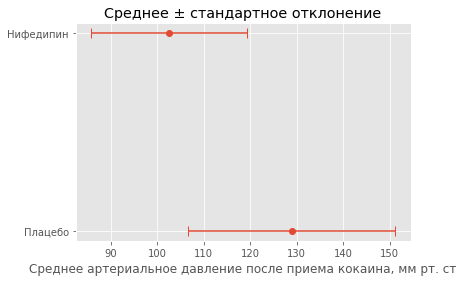

In [6]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Среднее артериальное давление после приема кокаина, мм рт. ст");

In [7]:
t_test(df["count"], df["mean"], df["std"], silent=False)

Объединенная оценка дисперсии: 390.282
Число степеней свободы: 20.0

t = 3.140
p = 0.005
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.845, t05 = 2.086

Различия статистически значимы. P = 0.005 < 0.01 (|t = 3.140| > t01 = 2.845)


Различия статистически значимы. Однако, вопреки первоначальным предположениям, нифедипин не повышает, а снижает артериальное давление.

**4.3**

Ш. Хейл и соавт. измеряли также диаметр коронарных артерии после приема нифедипина и плацебо. Позволяют ли приводимые ниже данные утверждать, что нифедипин влияет на диаметр коронарных артерий?

**Диаметр коронарной артерии, мм**

Плацебо|Нифедипин
-|-
2.5|2.5
2.2|1.7
2.6|1.5
2.0|2.5
2.1|1.4
1.8|1.9
2.4|2.3
2.3|2.0
2.7|2.6
2.7|2.3
1.9|2.2

In [8]:
df = pd.DataFrame(
    data=[[2.5, 2.5], [2.2, 1.7], [2.6, 1.5], [2.0, 2.5], [2.1, 1.4], [1.8, 1.9], [2.4, 2.3], [2.3, 2.0], [2.7, 2.6], [2.7, 2.3], [1.9, 2.2]],
    columns=["Плацебо", "Нифедипин"]
)

display(df)

df = df.describe().loc[["count", "mean", "std"]].T
display(df)

,Плацебо,Нифедипин
0,2.5,2.5
1,2.2,1.7
2,2.6,1.5
3,2.0,2.5
4,2.1,1.4
5,1.8,1.9
6,2.4,2.3
7,2.3,2.0
8,2.7,2.6
9,2.7,2.3


,count,mean,std
Плацебо,11.0,2.290909,0.317662
Нифедипин,11.0,2.081818,0.414290


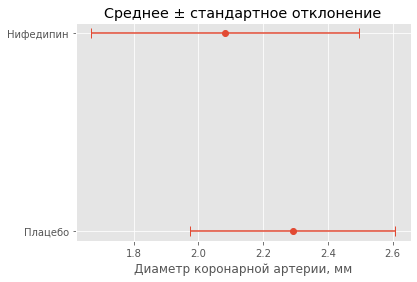

In [9]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Диаметр коронарной артерии, мм");

In [10]:
t_test(df["count"], df["mean"], df["std"], silent=False)

Объединенная оценка дисперсии: 0.136
Число степеней свободы: 20.0

t = 1.328
p = 0.199
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.845, t05 = 2.086

Различия статистически не значимы. P = 0.199 > 0.05 (|t = 1.328| < t05 = 2.086)


Нифедипин не влияет на диаметр коронарных артерий

**4.4.**
Решите задачи 3.1 и 3.5 используя критерий Стьюдента.

**4.4.1** 
> **3.1**
>
> Если  при  родах  шейка  матки  долго  не  раскрывается, то продолжительность родов увеличивается и может возникнуть необходимость кесарева сечения. Ч. О’Херлихи и Г. Мак-Дональд (С. O’Herlihy, H. MacDonaid. Influence of reproduction prostaglandin E2 vaginal gel on cervical ripening and labor. Obstet. Gynесоl., 54: 708—710, 1979) решили выяснить, ускоряет ли гель с простагландином Е2 раскрытие шейки матки. В исследование вошло 2 группы  рожениц.  Роженицам  первой  группы  вводили  в  шейку матки гель с простагландином Е2, роженицам второй группы вводили гель-плацебо. В обеих группах было по 21 роженице возраст, рост и сроки беременности были примерно одинаковы. Роды в группе, получавшей гель с простагландином Е2, длились в среднем 8,5 ч (стандартное отклонение 4,7 ч), в контрольной группе — 13,9 ч (стандартное отклонение — 4,1 ч). Можно ли утверждать, что гель с простагландином Е2 сокращал продолжительность родов?

In [11]:
N = 21

df = pd.DataFrame(
    data=[[8.5, 4.7], [13.9, 4.1]], 
    index=["Treatment group", "Control group"], 
    columns=["mean", "std"]
)

display(df)

,mean,std
Treatment group,8.5,4.7
Control group,13.9,4.1


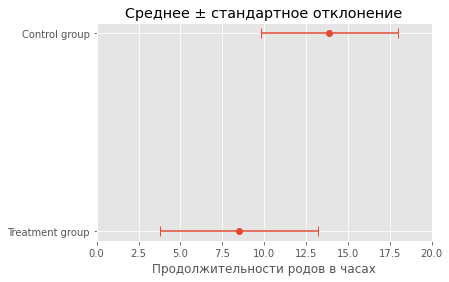

In [12]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);
ax.set_xlim(0, 20);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Продолжительности родов в часах");

In [13]:
t_test(N, df["mean"], df["std"], silent=False)

Объединенная оценка дисперсии: 19.450
Число степеней свободы: 40

t = -3.968
p = 0.000
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.704, t05 = 2.021

Различия статистически значимы. P = 0.000 < 0.01 (|t = -3.968| > t01 = 2.704)


**4.4.2**
> **3.5**
>
> Стремясь отделить действие тетрагидроканнабинолов от действия дыма, Г. Хубер и соавт. изучили их действие при внутривенном введении. После ингаляционного введения бактерий крысам  вводили  спиртовой  раствор  тетрагидроканнабинолов, контрольной группе вводили этиловый спирт. В обеих группах было по 36 животных. После введения тетрагидроканнабинолов доля погибших бактерий составила в среднем 51,4%, в контрольной группе — 59,4%. Стандартные ошибки среднего составили соответственно 3,2% и 3,9%. Позволяют ли эти данныеутверждать, что тетрагидроканнабинолы ослабляют антибактериальную защиту?

In [14]:
N = 36

df = pd.DataFrame(
    data=[[51.4, 3.2], [59.4, 3.9]],
    index=["Treatment group",  "Control group"], 
    columns=["mean", "SEM"]
)

df["std"] = df["SEM"] * 6 # sqrt(36)

display(df)

,mean,SEM,std
Treatment group,51.4,3.2,19.2
Control group,59.4,3.9,23.4


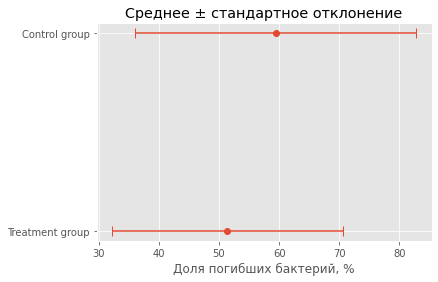

In [15]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Доля погибших бактерий, %");

In [16]:
t_test(N, df["mean"], df["std"], silent=False)

Объединенная оценка дисперсии: 458.100
Число степеней свободы: 70

t = -1.586
p = 0.117
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: t01 = 2.648, t05 = 1.994

Различия статистически не значимы. P = 0.117 > 0.05 (|t = -1.586| < t05 = 1.994)


**4.5**

Взадаче 3.2 приведеныданные, собранные Уайтом и Фребом о проходимости дыхательных путей у некурящих работающих в помещении, где не курят у пассивных курильщиков и у курильщиков выкуривающих различное число сигарет. Дисперсионный анализ обнаружил, что приведенные данные не согласуются с гипотезой о том, что проходимость дыхательных путей во всех группах одинакова. Выделите группы с одинаковой функцией легких. Что означает полученный результат, с точки зрения первоначально поставленного вопроса влияет ли пассивное курение на функцию легких?

**Максимальная объемная скорость средины выдоха, л/с**

Группа|Среднее|Стандартное отклонение
-|-|-
Некурящие работающие в помещении, где не курят | 3,17 | 0,74
Некурящие работающие в накуренном помещении | 2,72 | 0,71
Курящие выкуривающие небольшое число сигарет | 2,63 | 0,73
Курящие выкуривающие среднее число сигарет | 2,29 | 0,70
Курящие выкуривающие большое число сигарет | 2,12 | 0,72

In [17]:
N = 200

df = pd.DataFrame(
    data=[[3.17, 0.74],[2.72, 0.71],[2.63, 0.73],[2.29, 0.70],[2.12, 0.72]], 
    index=pd.MultiIndex.from_tuples([
        ("Некурящие", "работающие в помещении, где не курят"), 
        ("Некурящие", "работающие в накуренном помещении"), 
        ("Курящие", "выкуривающие небольшое число сигарет"), 
        ("Курящие", "выкуривающие среднее число сигарет"), 
        ("Курящие", "выкуривающие большое число сигарет")
        ]), 
    columns=["mean", "std"]
)

display(df)

mean   std
Некурящие работающие в помещении, где не курят  3.17  0.74
          работающие в накуренном помещении     2.72  0.71
Курящие   выкуривающие небольшое число сигарет  2.63  0.73
          выкуривающие среднее число сигарет    2.29  0.70
          выкуривающие большое число сигарет    2.12  0.72

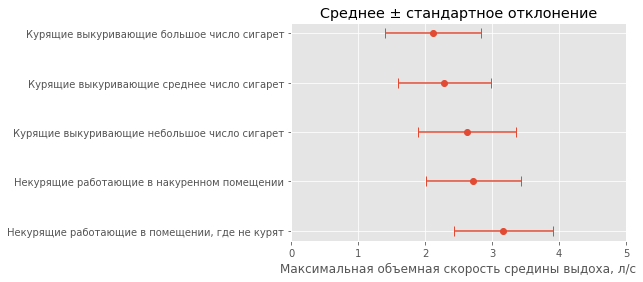

In [18]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=[' '.join(col) for col in df.index], xerr=df["std"], fmt='o', capsize=5);
ax.set_xlim(0, 5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Максимальная объемная скорость средины выдоха, л/с");

In [19]:
t_test_benf(N, df["mean"], df["std"], names=[' '.join(col) for col in df.index], silent=False)

Внутригрупповая оценка дисперсии: 0.519
Число степеней свободы: 995
Число сравнений: 10
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05 с учетом поправки Бонферрони: t01 = 3.300, t05 = 2.813


Различия статистически не значимы 0.00500 < p:
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие небольшое число сигарет') = -1.250 (p-value = 0.212)
	t('Курящие выкуривающие среднее число сигарет', 'Курящие выкуривающие большое число сигарет') = -2.361 (p-value = 0.018)

Пограничный случай, есть основания задуматься над наличием различий 0.00100 < p < 0.00500:
	--------------------------------------------

Различия статистически значимы p < 0.00100.
	t('Курящие выкуривающие небольшое число сигарет', 'Курящие выкуривающие среднее число сигарет') = -4.721 (p-value = 0.000)
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие среднее число сигарет') = -5.971 (p-value = 0.000)
	t('Некурящие работающие в помещении, г

In [20]:
#  Критерий Ньюмена-Кейлса, дает схожий результат
t_test_nk(N, df["mean"], df["std"], names=[' '.join(col) for col in df.index], silent=False)

Внутригрупповая оценка дисперсии: 0.519
Число степеней свободы: 995

Различия статистически не значимы:
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие небольшое число сигарет') = 1.767, l = 2, p-value = 0.212

Пограничный случай, есть основания задуматься над наличием различий:
	t('Курящие выкуривающие среднее число сигарет', 'Курящие выкуривающие большое число сигарет') = 3.338, l = 2, p-value = 0.018

Различия статистически значимы.
	t('Курящие выкуривающие небольшое число сигарет', 'Курящие выкуривающие среднее число сигарет') = 6.677, l = 2, p-value = 0.001
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие среднее число сигарет') = 8.444, l = 3, p-value = 0.001
	t('Некурящие работающие в помещении, где не курят', 'Некурящие работающие в накуренном помещении') = 8.837, l = 2, p-value = 0.001
	t('Курящие выкуривающие небольшое число сигарет', 'Курящие выкуривающие большое число сигарет') = 10.015, l = 3, p-value = 0.001
	t('Некурящие раб

In [21]:
#  Критерий Ньюмена-Кейлса, дает схожий результат
t_test_nk(N, df["mean"], df["std"], names=[' '.join(col) for col in df.index], tukey=True, silent=False)

Внутригрупповая оценка дисперсии: 0.519
Число степеней свободы: 995

Различия статистически не значимы:
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие небольшое число сигарет') = 1.767,  p-value = 0.696
	t('Курящие выкуривающие среднее число сигарет', 'Курящие выкуривающие большое число сигарет') = 3.338,  p-value = 0.127

Пограничный случай, есть основания задуматься над наличием различий:
	--------------------------------------------

Различия статистически значимы.
	t('Курящие выкуривающие небольшое число сигарет', 'Курящие выкуривающие среднее число сигарет') = 6.677,  p-value = 0.001
	t('Некурящие работающие в накуренном помещении', 'Курящие выкуривающие среднее число сигарет') = 8.444,  p-value = 0.001
	t('Некурящие работающие в помещении, где не курят', 'Некурящие работающие в накуренном помещении') = 8.837,  p-value = 0.001
	t('Курящие выкуривающие небольшое число сигарет', 'Курящие выкуривающие большое число сигарет') = 10.015,  p-value = 0.001
	t('Нек

Статистически не значимые различия обнаруживаются в группах:
* 'Некурящие работающие в накуренном помещении' и 'Курящие выкуривающие небольшое число сигарет'
* 'Курящие выкуривающие среднее число сигарет' и 'Курящие выкуривающие большое число сигарет'

Отличия проходимости дыхательных путей у некурящих, работающих в помещении, где не курят, и пассивных курильщиков статистически значимы.

**4.6**

Используя данные задачи 3.2, оцените статистическую значимость различий некурящих работающих в помещении, где не курят со всеми остальными группами. Воспользуйтесь критерием Даннета.

In [22]:
dunnetts_test(N, df["mean"], df["std"], names=[' '.join(col) for col in df.index], ctrl_group=0, silent=False)

Внутригрупповая оценка дисперсии: 0.519
Число степеней свободы: 995

Различия статистически не значимы, |q| < q05 = 2.470:
	--------------------------------------------

Пограничный случай, есть основания задуматься над наличием различий, q01 = 3.060 < |q| < q05 = 2.470:
	--------------------------------------------

Различия статистически значимы, q01 = 3.060 < |q|:
	q('Некурящие работающие в помещении, где не курят', 'Некурящие работающие в накуренном помещении') = 6.249
	q('Некурящие работающие в помещении, где не курят', 'Курящие выкуривающие небольшое число сигарет') = 7.499
	q('Некурящие работающие в помещении, где не курят', 'Курящие выкуривающие среднее число сигарет') = 12.220
	q('Некурящие работающие в помещении, где не курят', 'Курящие выкуривающие большое число сигарет') = 14.581


Отличия всех групп с контрольной статистически значимы.

**4.7**

Решив задачу 3.3, мы пришли к заключению, что уровень холестерина липопротеидов высокой плотности (ХЛПВП)
у бегунов марафонцев бегунов трусцой и лиц, не занимающихся спортом неодинаков. Пользуясь критерием Стьюдента с поправкой Бонферрони, сравните эти группы попарно.
> **3.3.**
>
> Низкий  уровень  холестерина  липопротеидов  высокой плотности  ( ХЛПВП)    —  фактор  риска  ишемической  болезни сердца. Некоторые исследования свидетельствуют, что физическая нагрузка может повысить уровень ХЛПВП. Дж. Хартунг и соавт. (G. Н. Hartung et al. Relation of diet to hidh-density liрoprotein cholesterol in middle-aged marathon runners, joggles, and inactive men. N. Engl. J. Med., 302:357—361, 1980) исследовали уровень ХЛПВП у бегунов-марафонцев, бегунов трусцой и лиц, не занимающихся спортом. Средний уровень ХЛПВП у лиц, не занимающихся спортом, составил 43,3 мг% (стандартное отклонение 14,2 мг%), у бегунов трусцой — 58,0 мг% (стандартное отклонение 17,7 мг%) и у марафонцев — 64,8 мг% (стандартное отклонение 14,3 мг%). Будем считать, что в каждой группе было по 70 человек. Оцените статистическую значимость различий между группами.

In [23]:
N = 70

df = pd.DataFrame(
    data=[[43.3, 14.2], [58.0, 17.7], [64.8, 14.3]], 
    index=["Не занимаются спортом", "Бегуны трусцой", "Марафонцы"], 
    columns=["mean", "std"]
)

display(df)

,mean,std
Не занимаются спортом,43.3,14.2
Бегуны трусцой,58.0,17.7
Марафонцы,64.8,14.3


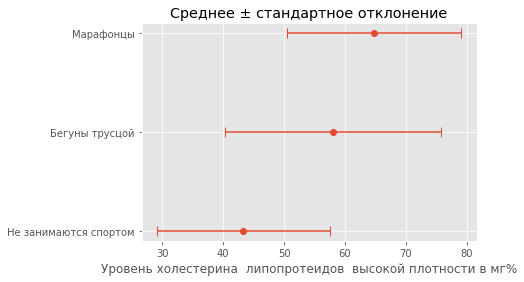

In [24]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Уровень холестерина  липопротеидов  высокой плотности в мг%");

In [25]:
t_test_benf(N, df["mean"], df["std"], names=df.index, silent=False)

Внутригрупповая оценка дисперсии: 239.807
Число степеней свободы: 207
Число сравнений: 3
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05 с учетом поправки Бонферрони: t01 = 2.970, t05 = 2.414


Различия статистически не значимы 0.01667 < p:
	--------------------------------------------

Пограничный случай, есть основания задуматься над наличием различий 0.00333 < p < 0.01667:
	t('Бегуны трусцой', 'Марафонцы') = 2.598 (p-value = 0.010)

Различия статистически значимы p < 0.00333.
	t('Не занимаются спортом', 'Бегуны трусцой') = 5.616 (p-value = 0.000)
	t('Не занимаются спортом', 'Марафонцы') = 8.214 (p-value = 0.000)


**4.8**

Используя данные задачи 3.3 и рассматривая группу не занимающихся спортом как контрольную сравните ее с остальными двумя группами. Используйте поправку Бонферрони.

In [26]:
t_test_benf(N, df["mean"], df["std"], names=df.index, ctrl_group=0, silent=False)

Внутригрупповая оценка дисперсии: 239.807
Число степеней свободы: 207
Число сравнений: 2
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05 с учетом поправки Бонферрони: t01 = 2.837, t05 = 2.258


Различия статистически не значимы 0.02500 < p:
	--------------------------------------------

Пограничный случай, есть основания задуматься над наличием различий 0.00500 < p < 0.02500:
	--------------------------------------------

Различия статистически значимы p < 0.00500.
	t('Не занимаются спортом', 'Бегуны трусцой') = 5.616 (p-value = 0.000)
	t('Не занимаются спортом', 'Марафонцы') = 8.214 (p-value = 0.000)


Не занимающиеся спортом статистически значимо отличаются как от бегунов трусцой, так и от марафонцев.

**4.9**

Пользуясь данными задачи 3.4, найдите группы с близкими показателями антибактериальной защиты.

> **3.4**
>
> Марихуана  —  наркотик,  поэтому  исследовать  курение марихуаны на добровольцах невозможно. Исследования такого рода проводят на лабораторных животных. Г. Хубер и соавт. (G. Huber et al. Marijuana, tetrahydrocannabinol, and pulmonary arterial antibacterial  defenses.  Chest,  77:403—410,  1980)  изучали  влияние  марихуаны  на  антибактериальную  защиту  у  крыс.  После ингаляционного  введения  бактерий  крыс  помещали  в  камеру, где специальная машина окуривала их сигаретами с марихуа ной. Забив крыс, исследователи извлекали легкие и подсчитывали процент погибших бактерий, который и служил показателем состояния антибактериальной защиты. Чтобы установить, что именно влияет на антибактериальную защиту — тетрагидроканнабинолы (вещества, которые обусловливают наркотическое действие марихуаны) или просто дым одну из групп окуривали сигаретами, из которых тетрагидроканнабинолы были удалены. В каждой группе было по 36 крыс. Являются ли различия статистически значимыми?

Число сигарет | Среднее | Стандартная ошибка среднего
-|-|-
0 (контроль) | 85,1 | 0,3
15 | 83,5 | 1,0
30 | 80,9 | 0,6
50 | 72,6 | 0,7
75 | 60 | 1,3
75  (тетрагидроканнабинота  удалены) | 73,5 | 0,7
150 | 63,8 | 2,6

In [27]:
N = 36

df = pd.DataFrame(
    data=[[85.1, 0.3], [83.5, 1.0], [80.9, 0.6], [72.6, 0.7], [60.0, 1.3], [73.5, 0.7], [63.8, 2.6]],
    index=["0 (контроль)", "15", "30", "50", "75", "75 (тетрагидроканнабинота  удалены)", "150"], 
    columns=["mean", "SEM"]
)

df["std"] = df["SEM"] * 6 # sqrt(36)

display(df)

,mean,SEM,std
0 (контроль),85.1,0.3,1.8
15,83.5,1.0,6.0
30,80.9,0.6,3.6
50,72.6,0.7,4.2
75,60.0,1.3,7.8
75 (тетрагидроканнабинота удалены),73.5,0.7,4.2
150,63.8,2.6,15.6


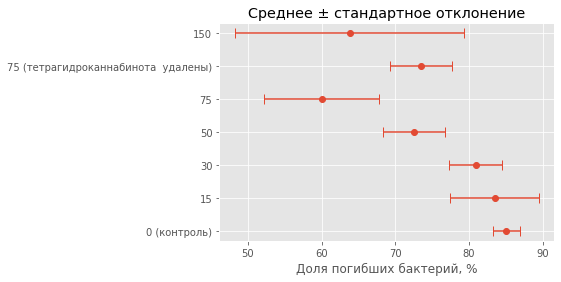

In [28]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Доля погибших бактерий, %");

In [29]:
t_test_benf(N, df["mean"], df["std"], names=df.index, silent=False)

Внутригрупповая оценка дисперсии: 55.954
Число степеней свободы: 245
Число сравнений: 21
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05 с учетом поправки Бонферрони: t01 = 3.541, t05 = 3.070


Различия статистически не значимы 0.00238 < p:
	t('50', '75 (тетрагидроканнабинота  удалены)') = 0.510 (p-value = 0.610)
	t('0 (контроль)', '15') = -0.907 (p-value = 0.365)
	t('15', '30') = -1.475 (p-value = 0.142)
	t('75', '150') = 2.155 (p-value = 0.032)
	t('0 (контроль)', '30') = -2.382 (p-value = 0.018)

Пограничный случай, есть основания задуматься над наличием различий 0.00048 < p < 0.00238:
	--------------------------------------------

Различия статистически значимы p < 0.00048.
	t('30', '75 (тетрагидроканнабинота  удалены)') = -4.197 (p-value = 0.000)
	t('30', '50') = -4.708 (p-value = 0.000)
	t('50', '150') = -4.991 (p-value = 0.000)
	t('75 (тетрагидроканнабинота  удалены)', '150') = -5.502 (p-value = 0.000)
	t('15', '75 (тетрагидроканнабинот

In [30]:
t_test_nk(N, df["mean"], df["std"], names=df.index, silent=False)

Внутригрупповая оценка дисперсии: 55.954
Число степеней свободы: 245

Различия статистически не значимы:
	t('75 (тетрагидроканнабинота  удалены)', '50') = 0.722, l = 2, p-value = 0.620
	t('0 (контроль)', '15') = 1.283, l = 2, p-value = 0.365
	t('15', '30') = 2.085, l = 2, p-value = 0.142

Пограничный случай, есть основания задуматься над наличием различий:
	t('150', '75') = 3.048, l = 2, p-value = 0.032
	t('0 (контроль)', '30') = 3.369, l = 3, p-value = 0.047

Различия статистически значимы.
	t('30', '75 (тетрагидроканнабинота  удалены)') = 5.936, l = 2, p-value = 0.001
	t('30', '50') = 6.658, l = 3, p-value = 0.001
	t('50', '150') = 7.059, l = 2, p-value = 0.001
	t('75 (тетрагидроканнабинота  удалены)', '150') = 7.780, l = 3, p-value = 0.001
	t('15', '75 (тетрагидроканнабинота  удалены)') = 8.021, l = 3, p-value = 0.001
	t('15', '50') = 8.743, l = 4, p-value = 0.001
	t('0 (контроль)', '75 (тетрагидроканнабинота  удалены)') = 9.304, l = 4, p-value = 0.001
	t('0 (контроль)', '50') = 10.

В обоих подходах выделяются пять пар со статистически не значимыми различиями, которые разделяются на три группы:
* Контрольная группа, 15 и 30 сигарет
* 75 сигарет без тетрагидроканнабинолов и 50 сигарет
* 75 и 150 сигарет

**4.10**

По данным задачи 3.7 опишите различия групп. Используйте поправку Бонферрони.

> **3.7**
>
> Нитропруссид натрия и дофамин — препараты, которые широко  используют  при  инфаркте  миокарда  (Инфаркт миокарда развивается вследствие закупорки одной из коронарных артерий. Кровь перестает поступать к тому или иному участку миокарда, который в результате отмирает от недостатка кислорода). Считается, что нитропруссид натрия облегчает работу сердца и тем самым снижает потребность миокарда в кислороде; в результате устойчивость миокарда к недостаточному кровоснабжению повышается. Дофамин препятствует падению артериального давления и увеличивает поступление крови к пораженному участку через дополнительные сосуды (так называемые коллатерали). К. Шатни и соавт. (C. Shatney et al. Effects of infusion of dopamine and nitroprusside on size of experimental myocardial infarction. Chest., 73:850—856, 1978) сравнили эффективность этих  препаратов  в  опытах  на  собаках  с  инфарктом  миокарда. Инфаркт миокарда вызывали перевязкой коронарной артерии, после чего вводили препарат (собакам контрольной группы вводили физиологический раствор). Через 6 часов собак забивалии взвешивали пораженный участок миокарда, результат выражали в процентах от веса левого желудочка. Препарат для каждой собаки выбирали случайным образом. Исследователь, взвешивавший  миокард,  не  знал,  какой  препарат  вводили  собаке. Полученные данные приведены в таблице (Вес пораженного участка миокарда (в процентах от веса левого желудочка)):

Группа|Число животных|Среднее|Стандартная ошибка среднего
-|-|-|-
Контроль|30|15|1
Дофамин низкая доза|13|15|2
Дофамин высокая доза|20|9|2
Нитропруссид|20|7|1

> Можно ли считать различия между группами статистически значимыми?

In [31]:
df = pd.DataFrame(
    data=[[30, 15, 1], [13, 15, 2], [20, 9, 2], [20, 7, 1]],
    index=["Контроль", "Дофамин низкая доза", "Дофамин высокая доза", "Нитропруссид"],
    columns=["n", "mean", "SME"]
)

df["std"] = df["SME"] * df["n"]**.5

display(df)

,n,mean,SME,std
Контроль,30,15,1,5.477226
Дофамин низкая доза,13,15,2,7.211103
Дофамин высокая доза,20,9,2,8.944272
Нитропруссид,20,7,1,4.472136


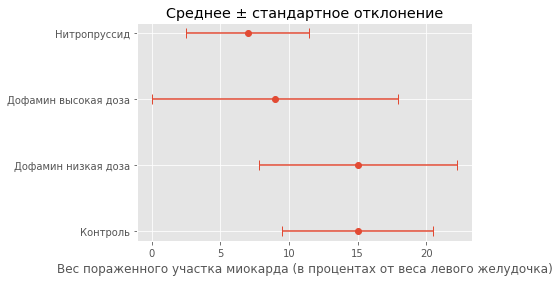

In [32]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Вес пораженного участка миокарда (в процентах от веса левого желудочка)");

In [33]:
t_test_benf(df["n"], df["mean"], df["std"], names=df.index, silent=False)

Внутригрупповая оценка дисперсии: 43.084
Число степеней свободы: 79
Число сравнений: 6
Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05 с учетом поправки Бонферрони: t01 = 3.256, t05 = 2.706


Различия статистически не значимы 0.00833 < p:
	t('Контроль', 'Дофамин низкая доза') = 0.000 (p-value = 1.000)
	t('Дофамин высокая доза', 'Нитропруссид') = -0.964 (p-value = 0.338)
	t('Дофамин низкая доза', 'Дофамин высокая доза') = -2.566 (p-value = 0.012)

Пограничный случай, есть основания задуматься над наличием различий 0.00167 < p < 0.00833:
	t('Контроль', 'Дофамин высокая доза') = -3.167 (p-value = 0.002)

Различия статистически значимы p < 0.00167.
	t('Дофамин низкая доза', 'Нитропруссид') = -3.421 (p-value = 0.001)
	t('Контроль', 'Нитропруссид') = -4.222 (p-value = 0.000)


Выделяеются две группы со статистически не значимыми различиями:
* 'Контроль' и 'Дофамин низкая доза'
* 'Дофамин высокая доза' и 'Нитропруссид'

Сравнение 'Дофамин низкая доза' и 'Дофамин высокая доза' имеет очень близкое к криитическому значению t (при этом p-value = 0.012) и учитывая «жесткость» поправки Бонферрони и результаты других сравнений, можно предположить, что различия все же статистически значимы. 

**4.11**

Решите снова задачу 4.10, пользуясь критерием Ньюмена—Кейлса. Сравните результат с решением задачи 4.10 и объясните различия, если они есть.

In [34]:
t_test_nk(df["n"], df["mean"], df["std"], names=df.index, silent=False)

Внутригрупповая оценка дисперсии: 43.084
Число степеней свободы: 79

Различия статистически не значимы:
	t('Дофамин низкая доза', 'Контроль') = 0.000, l = 2, p-value = 0.900
	t('Дофамин высокая доза', 'Нитропруссид') = 1.363, l = 2, p-value = 0.338

Пограничный случай, есть основания задуматься над наличием различий:
	t('Дофамин низкая доза', 'Дофамин высокая доза') = 3.629, l = 3, p-value = 0.032

Различия статистически значимы.
	t('Контроль', 'Дофамин высокая доза') = 4.478, l = 2, p-value = 0.002
	t('Дофамин низкая доза', 'Нитропруссид') = 4.838, l = 4, p-value = 0.005
	t('Контроль', 'Нитропруссид') = 5.971, l = 3, p-value = 0.001


Общий вывод тот же, что и в предыдущей задаче, при этом различие дофамина в низкой и высокой дозе теперь статистически значимо.

**4.12**
В задаче 3.6 мы установили, что существуют различия в степени опустошенности у медицинских сестер работающих с больными разной тяжести. В чем заключаются эти различия?
> **3.6**
>
> Работа медицинской сестры сопряжена с постоянным напряжением и тяжелыми переживаниями. Груз ответственности, не уравновешенной правом принимать решения, рождает чувство усталости, раздражения и безысходности, интересная некогда работа становится ненавистным бременем. Этот синдром не совсем точно называют опустошенностью. Считается, что его развитию особенно подвержены медицинские сестры, которые работают с наиболее тяжелыми больными. Чтобы проверить это предположение, Э. Кин и соавт. (A. Keane et al. Stress in ICU and non-ICU  nurses.  Nurs.  Res.,  34:231—236,  1985)  провели  опрос медицинских сестер с помощью специально разработанного опросника, позволяющего оценить опустошенность в баллах. Медицинских  сестер  разделили  на  три  группы  в  зависимости  от тяжести состояния больных, с которыми они работали (1-я группа — наиболее тяжелые больные, 3-я — самые легкие). Далее каждую  группу  разделили  на  две  —  медицинские  сестры  хирургических и терапевтических отделений, таким образом, получилось 6 групп по 16 медицинских сестер в каждой. Являются ли различия между 6 группами статистически значимыми?

_|Гр.1 Хир.|Гр.1 Тер.|Гр.2 Хир.|Гр.2 Тер.|Гр.3 Хир.|Гр.3 Тер.
-|-|-|-|-|-|-
Среднее|49.9|51.2|57.3|46.4|43.9|65.2
Стандартное отклонение|14.3|13.4|14.9|14.7|16.5|20.5

In [35]:
N = 16

df = pd.DataFrame(
    data=[[49.9, 51.2, 57.3, 46.4, 43.9, 65.2], [14.3, 13.4, 14.9, 14.7, 16.5, 20.5]],
    index=["mean", "std"], 
    columns=pd.MultiIndex.from_tuples(product([f"Группа {n}" for n in "123"], ["Хир.", "Тер."]))
)

display(df)

Группа 1       Группа 2       Группа 3      
         Хир.  Тер.     Хир.  Тер.     Хир.  Тер.
mean     49.9  51.2     57.3  46.4     43.9  65.2
std      14.3  13.4     14.9  14.7     16.5  20.5

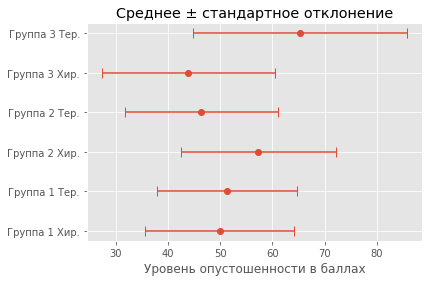

In [36]:
fig, ax = plt.subplots()

plt.errorbar(x=df.loc["mean"], y=[" ".join(x) for x in df.columns], xerr=df.loc["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Уровень опустошенности в баллах");

Групп слишком много, чтобы применить поправку Бонферрони: она окажется слишком «строгой». Применим поэтому критерий Ньюмена—Кейлса.

In [37]:
t_test_nk(N, df.loc["mean"], df.loc["std"], names=[" ".join(x) for x in df.columns], silent=False)  #type: ignore (не понимает что это pd.Series)

Внутригрупповая оценка дисперсии: 252.442
Число степеней свободы: 90

Различия статистически не значимы:
	t('Группа 1 Тер.', 'Группа 1 Хир.') = 0.327, l = 2, p-value = 0.824
	t('Группа 2 Тер.', 'Группа 3 Хир.') = 0.629, l = 2, p-value = 0.668
	t('Группа 1 Хир.', 'Группа 2 Тер.') = 0.881, l = 2, p-value = 0.539
	t('Группа 1 Тер.', 'Группа 2 Тер.') = 1.208, l = 3, p-value = 0.656
	t('Группа 1 Хир.', 'Группа 3 Хир.') = 1.511, l = 3, p-value = 0.535
	t('Группа 2 Хир.', 'Группа 1 Тер.') = 1.536, l = 2, p-value = 0.280
	t('Группа 1 Тер.', 'Группа 3 Хир.') = 1.838, l = 4, p-value = 0.558
	t('Группа 2 Хир.', 'Группа 1 Хир.') = 1.863, l = 3, p-value = 0.391
	t('Группа 3 Тер.', 'Группа 2 Хир.') = 1.989, l = 2, p-value = 0.163
	t('Группа 2 Хир.', 'Группа 2 Тер.') = 2.744, l = 4, p-value = 0.219
	t('Группа 2 Хир.', 'Группа 3 Хир.') = 3.374, l = 5, p-value = 0.129

Пограничный случай, есть основания задуматься над наличием различий:
	t('Группа 3 Тер.', 'Группа 1 Тер.') = 3.525, l = 3, p-value = 0.0

Явно выделяется 3-я группа медсестер из терапевтических отделений и их можно отнести к категории высокой опутошенности.

Другая группа представляет собой всех остальных за исключением медсестер 2-й группы хирургических отделений, назовем их категорией умеренной опусошенности.

Медсестры 2-й группы хирургических отделений стоят особняком и могут быть отнесены либо к первой, либо ко второй группе. Однако в данном случае решить эту неоднозначность наверное стоит в пользу категории высокой опустошенности.